In [41]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

In [4]:
train = pd.read_csv('prac7Train.csv')
test = pd.read_csv('prac7Test.csv')
train.head()

,Unnamed: 0,D8S1179,D21S11,D7S820,CSF1PO,D3S1358,TH01,D13S317,D16S539,D2S1338,D19S433,vWA,TPOX,D18S51,D5S818,FGA,population
0,OT07760,21,59.0,17.0,21,34.0,13.0,22,23,41,30.2,33,19,35.0,24,47.0,Caucasian
1,PT84187,29,55.0,20.0,18,33.0,15.3,23,26,38,27.0,36,21,35.0,26,47.0,African American
2,UA16921,22,60.0,19.0,21,32.0,16.0,22,22,46,25.0,33,21,25.0,22,40.0,Caucasian
3,PT83880,26,61.2,17.0,20,31.0,16.0,21,22,44,27.0,35,19,28.0,22,47.0,African American
4,Y6,29,63.2,20.0,24,33.0,15.3,26,24,43,28.0,34,16,28.0,25,43.0,Caucasian


In [20]:
X_train, y_train = train.drop(columns=['population', 'Unnamed: 0']), train['population']
X_test, y_test = test.drop(columns=['population', 'Unnamed: 0']), test['population']
treemodel = DecisionTreeClassifier(max_depth=7, random_state=0)
treemodel.fit(X_train, y_train)
treemodel.score(X_test, y_test), treemodel.score(X_train, y_train)

(0.7751479289940828, 0.9255014326647565)

In [19]:
forestmodel = RandomForestClassifier(max_depth=7, random_state=0)
forestmodel.fit(X_train, y_train)
forestmodel.score(X_test, y_test), forestmodel.score(X_train, y_train)

(0.7869822485207101, 0.9885386819484241)

In [38]:
y_prob = forestmodel.predict_proba(X_test)[:, 1]
y = y_test.copy()
y[y_test == 'Caucasian'] = 1
y[y_test == 'African American'] = 0
y = y.astype(int)
fpr, tpr, _ = roc_curve(y, y_prob)
roc_auc = auc(fpr, tpr)

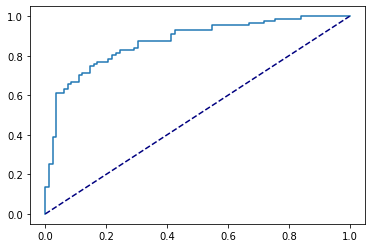

In [43]:
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')